* Explore the dataset - EDA
* Wrangle dataset - Cleaning dataset
* Build a regression model to predict insurance price
* Model interpretation
* Create amazing visualization using plotly, seaborn, tableau
* Deploy project using flask and/or plotly using Heroku

In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/EvidenceN/Insurance_premium_prediction/master/data/auto_insurance_data.csv")

In [3]:
pd.options.display.max_columns = 999

In [4]:
insurance.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [5]:
insurance.shape

(9134, 24)

In [6]:
from pandas_profiling import ProfileReport

In [7]:
#profile = ProfileReport(insurance)

In [8]:
#profile

# Things to do and check out -- Data WRANGLING steps to complete
## Regression problem - 2 Models for 2 targets.
**one target = predicting insurance premium** 

**second target = predicting customer lifetime value**
### Find the meaning of column names

* [x] Profile report says no date column - Wrong, convert date column to date. Convert Effective_to_date to dates
* [x] Drop customer column because it doesn't matter
* [x] Encode Coverage column - categorical to integer
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [] Change customer lifetime value to 2 significant figures
* [] Change monthly premium to 2 significant figures
* [] Look at correlation between monthly premium and customer lifetime value
* [] Encode education column into categorical
* [x] change effective_to_date from object to date
* [] Change employment status into numbers
* [] Change gender into numbers
* [] Change location_code into integer
* [] Change marital status into integer
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] Type of policy needs to be converted into integers
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [] change sales_channel to integer
* [] change state to integers - encoding
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] encode vehicle class and 
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] Encode vehicle size into integer

Marked checkbox unicode  - &#x2611;
Marked checkbox unicode  - &#9745;

In [9]:
insurance.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [10]:
# Convert Effective_To_Date from categorical to date
# Effective_to_date could mean the day insurance starts or could be interpreted
# as the day insurance ends. As in effective until this date. 

insurance["activation_date"] = pd.to_datetime(insurance["Effective To Date"], infer_datetime_format = True)

In [11]:
insurance.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                        object
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [12]:
insurance.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
0         Agent          384.811147   Two-Door Car      Medsize   
1         Agent         1131.464935  Four-Door Car      Medsize   
2         Agent          566.472247   Two-Door Car      Medsize   
3   Call Center          529.881344            SUV      Medsize   
4         Agent          138.130879  Four-Door Car      Medsize   

  activation_date  
0      2011-02-24  
1      2011-01-31  
2      2011-02-19  
3      2011-01-20  
4      2011-02-03

In [13]:
insurance = insurance.drop(columns = ["Customer", "Effective To Date"])

In [14]:
insurance.head()

State  Customer Lifetime Value Response  Coverage Education  \
0  Washington              2763.519279       No     Basic  Bachelor   
1     Arizona              6979.535903       No  Extended  Bachelor   
2      Nevada             12887.431650       No   Premium  Bachelor   
3  California              7645.861827       No     Basic  Bachelor   
4  Washington              2813.692575       No     Basic  Bachelor   

  EmploymentStatus Gender  Income Location Code Marital Status  \
0         Employed      F   56274      Suburban        Married   
1       Unemployed      F       0      Suburban         Single   
2         Employed      F   48767      Suburban        Married   
3       Unemployed      M       0      Suburban        Married   
4         Employed      M   43836         Rural         Single   

   Monthly Premium Auto  Months Since Last Claim  \
0                    69                       32   
1                    94                       13   
2                   108                       18   
3                   106                       18   
4                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
0         Agent          384.811147   Two-Door Car      Medsize   
1         Agent         1131.464935  Four-Door Car      Medsize   
2         Agent          566.472247   Two-Door Car      Medsize   
3   Call Center          529.881344            SUV      Medsize   
4         Agent          138.130879  Four-Door Car      Medsize   

  activation_date  
0      2011-02-24  
1      2011-01-31  
2      2011-02-19  
3      2011-01-20  
4      2011-02-03

In [15]:
# split data into train, test, validation dataset before proceeding. 
# should have done this before chaging to datetime and dropping columns. 

from sklearn.model_selection import train_test_split

train, test = train_test_split(insurance, train_size = 0.85, test_size=0.15, random_state=42)

# validation dataset

train, val = train_test_split(train, train_size = 0.85, test_size=0.15, random_state=42)

In [16]:
#encode coverage column from categorical to integer

insurance['Coverage'].describe()

count      9134
unique        3
top       Basic
freq       5568
Name: Coverage, dtype: object

In [17]:
insurance['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [18]:
#[{‘col’: ‘col1’, ‘mapping’: {None: 0, ‘a’: 1, ‘b’: 2}}] correct mapping structure for ordinal encoding

coverage_dictionary = [{'col': 'Coverage','mapping':{"Basic":1, "Extended":2, "Premium": 3}}]

In [19]:
# use ordinal encoding to do encode coverage column

import category_encoders as ce

coverage_encoder = ce.OrdinalEncoder(cols="Coverage", mapping=coverage_dictionary)

In [20]:
train_encoded = coverage_encoder.fit_transform(train)
test_encoded = coverage_encoder.transform(test)

In [21]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage Education  \
5249     Arizona              4786.889347       No         1   College   
2077     Arizona              8838.085637      Yes         1  Bachelor   
6357      Oregon             11638.899470      Yes         1   College   
8128  California              4670.953723       No         1   College   
6787     Arizona              2352.367900       No         1   College   

     EmploymentStatus Gender  Income Location Code Marital Status  \
5249         Employed      M   45515         Urban        Married   
2077         Employed      M   82664         Rural        Married   
6357    Medical Leave      F   25370      Suburban        Married   
8128       Unemployed      F       0         Urban       Divorced   
6787       Unemployed      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center          236.907007   Two-Door Car        Large   
2077         Agent          133.425609            SUV      Medsize   
6357        Branch          489.600000     Sports Car        Large   
8128   Call Center          181.810486  Four-Door Car      Medsize   
6787        Branch          381.062306  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

In [22]:
train_encoded['Coverage'].describe()

count    6598.000000
mean        1.475447
std         0.651431
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: Coverage, dtype: float64

In [23]:
train['Coverage'].value_counts()

Basic       4038
Extended    1983
Premium      577
Name: Coverage, dtype: int64

In [24]:
train_encoded['Coverage'].value_counts()

1    4038
2    1983
3     577
Name: Coverage, dtype: int64

In [25]:
test['Coverage'].value_counts()

Basic       826
Extended    421
Premium     124
Name: Coverage, dtype: int64

In [26]:
test_encoded['Coverage'].value_counts()

1    826
2    421
3    124
Name: Coverage, dtype: int64

In [27]:
# encode education from categorical value to integers

train["Education"].describe()

count         6598
unique           5
top       Bachelor
freq          1992
Name: Education, dtype: object

In [28]:
train["Education"].value_counts()

Bachelor                1992
College                 1926
High School or Below    1898
Master                   521
Doctor                   261
Name: Education, dtype: int64

In [29]:
# combine college and bachelor into one datatype. Could be that
# college means people that went to college but didn't graduate
# Combine college and bachelor for clarification and easier assessment

train['Education'] = train['Education'].replace({"College":"Bachelor"})

In [30]:
train["Education"].value_counts()

Bachelor                3918
High School or Below    1898
Master                   521
Doctor                   261
Name: Education, dtype: int64

In [31]:
test['Education'] = test['Education'].replace({"College":"Bachelor"});

In [32]:
test["Education"].value_counts()

Bachelor                806
High School or Below    398
Master                  125
Doctor                   42
Name: Education, dtype: int64

In [33]:
# encoding education column from categorical into integers

education_dictionary = [{'col': 'Education','mapping':{"High School or Below":1, 
                                                       "Bachelor":2, "Master": 3,
                                                      "Doctor": 4}}]

education_encoder = ce.OrdinalEncoder(cols="Education", mapping=education_dictionary)


train_encoded['Education'] = train_encoded['Education'].replace({"College":"Bachelor"})
test_encoded['Education'] = test_encoded['Education'].replace({"College":"Bachelor"})

train_encoded = education_encoder.fit_transform(train_encoded)
test_encoded = education_encoder.transform(train_encoded)

In [34]:
train_encoded['Education'].value_counts()

2    3918
1    1898
3     521
4     261
Name: Education, dtype: int64

In [35]:
train_encoded.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'activation_date'],
      dtype='object')

In [36]:
# rounding various series in our dataframe. 
# columns to round - lifetime value, monthly premium, total claim amount

train_encoded = train_encoded.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})
test_encoded = test_encoded.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})
train = train.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})
test = test.round({"Customer Lifetime Value": 2, "Total Claim Amount": 2})

In [37]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

     EmploymentStatus Gender  Income Location Code Marital Status  \
5249         Employed      M   45515         Urban        Married   
2077         Employed      M   82664         Rural        Married   
6357    Medical Leave      F   25370      Suburban        Married   
8128       Unemployed      F       0         Urban       Divorced   
6787       Unemployed      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center              236.91   Two-Door Car        Large   
2077         Agent              133.43            SUV      Medsize   
6357        Branch              489.60     Sports Car        Large   
8128   Call Center              181.81  Four-Door Car      Medsize   
6787        Branch              381.06  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

# Things to do and check out -- Data WRANGLING steps to complete
## Regression problem - 2 Models for 2 targets.
**one target = predicting insurance premium** 

**second target = predicting customer lifetime value**
### Find the meaning of column names

* [x] Profile report says no date column - Wrong, convert date column to date. Convert Effective_to_date to dates
* [x] Drop customer column because it doesn't matter
* [x] Encode Coverage column - categorical to integer
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [x] Change customer lifetime value to 2 significant figures
* [x] Change total claim amount to 2 significant figures
* [] Look at correlation between monthly premium and customer lifetime value
* [x] Encode education column into categorical
* [x] change effective_to_date from object to date
* [x] Change employment status into numbers
* [x] Change gender into numbers
* [x] Change location_code into integer
* [] Change marital status into integer
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] Type of policy needs to be converted into integers
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [] change sales_channel to integer
* [] change state to integers - encoding
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] encode vehicle class and 
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] Encode vehicle size into integer

Week 3 of project. Starting with encoding employment status

What type of encoding. Does order matter in this encoding. 

Start by using one hot encoding and then in the future

**COME BACK AND TRY OUT TARGET ENCODING TO SEE 
EFFECTS ON MODEL**. 

In [38]:
train_encoded["EmploymentStatus"].describe()

count         6598
unique           5
top       Employed
freq          4095
Name: EmploymentStatus, dtype: object

In [39]:
train_encoded["EmploymentStatus"].value_counts()

Employed         4095
Unemployed       1674
Medical Leave     323
Disabled          297
Retired           209
Name: EmploymentStatus, dtype: int64

Train, Test = RAW UNMANIPULATED DATA

**and**

Train_encoded, test_encoded is MANIPULATED DATAFRAME

In [40]:
# Encode employment status column with one hot encoding
# experiment with target encoding later. 
# order doesn't matter in this column situation

employment_encoder = ce.OneHotEncoder(cols = "EmploymentStatus", use_cat_names=True)

train_encoded = employment_encoder.fit_transform(train_encoded)
test_encoded = employment_encoder.transform(test_encoded)

In [41]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
5249                          1                               0   
2077                          1                               0   
6357                          0                               1   
8128                          0                               0   
6787                          0                               0   

      EmploymentStatus_Unemployed  EmploymentStatus_Disabled  \
5249                            0                          0   
2077                            0                          0   
6357                            0                          0   
8128                            1                          0   
6787                            1                          0   

      EmploymentStatus_Retired Gender  Income Location Code Marital Status  \
5249                         0      M   45515         Urban        Married   
2077                         0      M   82664         Rural        Married   
6357                         0      F   25370      Suburban        Married   
8128                         0      F       0         Urban       Divorced   
6787                         0      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center              236.91   Two-Door Car        Large   
2077         Agent              133.43            SUV      Medsize   
6357        Branch              489.60     Sports Car        Large   
8128   Call Center              181.81  Four-Door Car      Medsize   
6787        Branch              381.06  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

In [42]:
test_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1       -1.0   
2077     Arizona                  8838.09      Yes         1       -1.0   
6357      Oregon                 11638.90      Yes         1       -1.0   
8128  California                  4670.95       No         1       -1.0   
6787     Arizona                  2352.37       No         1       -1.0   

      EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
5249                          1                               0   
2077                          1                               0   
6357                          0                               1   
8128                          0                               0   
6787                          0                               0   

      EmploymentStatus_Unemployed  EmploymentStatus_Disabled  \
5249                            0                          0   
2077                            0                          0   
6357                            0                          0   
8128                            1                          0   
6787                            1                          0   

      EmploymentStatus_Retired Gender  Income Location Code Marital Status  \
5249                         0      M   45515         Urban        Married   
2077                         0      M   82664         Rural        Married   
6357                         0      F   25370      Suburban        Married   
8128                         0      F       0         Urban       Divorced   
6787                         0      F       0      Suburban       Divorced   

      Monthly Premium Auto  Months Since Last Claim  \
5249                    61                       14   
2077                   114                       24   
6357                   102                       10   
8128                    64                       25   
6787                    64                        4   

      Months Since Policy Inception  Number of Open Complaints  \
5249                             33                          0   
2077                             10                          3   
6357                             77                          0   
8128                             89                          0   
6787                             61                          0   

      Number of Policies     Policy Type        Policy Renew Offer Type  \
5249                   9   Personal Auto   Personal L3           Offer2   
2077                   9  Corporate Auto  Corporate L3           Offer2   
6357                   2   Personal Auto   Personal L3           Offer1   
8128                   4  Corporate Auto  Corporate L2           Offer2   
6787                   1  Corporate Auto  Corporate L2           Offer1   

     Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  \
5249   Call Center              236.91   Two-Door Car        Large   
2077         Agent              133.43            SUV      Medsize   
6357        Branch              489.60     Sports Car        Large   
8128   Call Center              181.81  Four-Door Car      Medsize   
6787        Branch              381.06  Four-Door Car      Medsize   

     activation_date  
5249      2011-01-02  
2077      2011-01-21  
6357      2011-01-26  
8128      2011-02-15  
6787      2011-01-19

In [43]:
# changing employement status column names on train dataset

train_encoded = train_encoded.rename(columns = {"EmploymentStatus_Employed": "Employed", "EmploymentStatus_Unemployed": "Unemployed",
                                      "EmploymentStatus_Disabled": "Disabled", "EmploymentStatus_Retired": "Retired",
                                      "EmploymentStatus_Medical Leave": "Medical_Leave"})

In [44]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired Gender  Income  \
5249         1              0           0         0        0      M   45515   
2077         1              0           0         0        0      M   82664   
6357         0              1           0         0        0      F   25370   
8128         0              0           1         0        0      F       0   
6787         0              0           1         0        0      F       0   

     Location Code Marital Status  Monthly Premium Auto  \
5249         Urban        Married                    61   
2077         Rural        Married                   114   
6357      Suburban        Married                   102   
8128         Urban       Divorced                    64   
6787      Suburban       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [45]:
# changing employement status column names on test dataset

test_encoded = test_encoded.rename(columns = {"EmploymentStatus_Employed": "Employed", "EmploymentStatus_Unemployed": "Unemployed",
                                      "EmploymentStatus_Disabled": "Disabled", "EmploymentStatus_Retired": "Retired",
                                      "EmploymentStatus_Medical Leave": "Medical_Leave"})

In [46]:
# encode gender to be numerical. 

train['Gender'].value_counts()

F    3377
M    3221
Name: Gender, dtype: int64

In [47]:
# Encode gender column with one hot encoding
# order doesn't matter in this column situation

gender_encoder = ce.OneHotEncoder(cols = "Gender", use_cat_names=True)

train_encoded = gender_encoder.fit_transform(train_encoded)
test_encoded = gender_encoder.transform(test_encoded)

In [48]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Gender_M  \
5249         1              0           0         0        0         1   
2077         1              0           0         0        0         1   
6357         0              1           0         0        0         0   
8128         0              0           1         0        0         0   
6787         0              0           1         0        0         0   

      Gender_F  Income Location Code Marital Status  Monthly Premium Auto  \
5249         0   45515         Urban        Married                    61   
2077         0   82664         Rural        Married                   114   
6357         1   25370      Suburban        Married                   102   
8128         1       0         Urban       Divorced                    64   
6787         1       0      Suburban       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [49]:
# change gender column names on train and test dataset. 

train_encoded = train_encoded.rename(columns = {"Gender_M": "Male", "Gender_F": "Female"})
test_encoded = test_encoded.rename(columns = {"Gender_M": "Male", "Gender_F": "Female"})

In [50]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income Location Code Marital Status  Monthly Premium Auto  \
5249   45515         Urban        Married                    61   
2077   82664         Rural        Married                   114   
6357   25370      Suburban        Married                   102   
8128       0         Urban       Divorced                    64   
6787       0      Suburban       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [51]:
train["Location Code"].describe()

count         6598
unique           3
top       Suburban
freq          4190
Name: Location Code, dtype: object

In [52]:
train["Location Code"].value_counts()

Suburban    4190
Rural       1268
Urban       1140
Name: Location Code, dtype: int64

In [53]:
# Encode location code column with one hot encoding
# order doesn't matter in this column situation

location_encoder = ce.OneHotEncoder(cols = "Location Code", use_cat_names=True)

train_encoded = location_encoder.fit_transform(train_encoded)
test_encoded = location_encoder.transform(test_encoded)

In [54]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Location Code_Urban  Location Code_Rural  \
5249   45515                    1                    0   
2077   82664                    0                    1   
6357   25370                    0                    0   
8128       0                    1                    0   
6787       0                    0                    0   

      Location Code_Suburban Marital Status  Monthly Premium Auto  \
5249                       0        Married                    61   
2077                       0        Married                   114   
6357                       1        Married                   102   
8128                       0       Divorced                    64   
6787                       1       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [55]:
# change gender column names on train and test dataset. 

train_encoded = train_encoded.rename(columns = {"Location Code_Urban": "Urban", "Location Code_Rural": "Rural", 
                                                "Location Code_Suburban":"Suburban"})
test_encoded = test_encoded.rename(columns = {"Location Code_Urban": "Urban", "Location Code_Rural": "Rural", 
                                                "Location Code_Suburban":"Suburban"})

In [56]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban Marital Status  Monthly Premium Auto  \
5249   45515      1      0         0        Married                    61   
2077   82664      0      1         0        Married                   114   
6357   25370      0      0         1        Married                   102   
8128       0      1      0         0       Divorced                    64   
6787       0      0      0         1       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class Vehicle Size activation_date  
5249   Two-Door Car        Large      2011-01-02  
2077            SUV      Medsize      2011-01-21  
6357     Sports Car        Large      2011-01-26  
8128  Four-Door Car      Medsize      2011-02-15  
6787  Four-Door Car      Medsize      2011-01-19

In [57]:
# change to integer these columns 

# marital status, sales_channel, state, vehicle size, type of policy, vehicle class, 
# 

In [58]:
train['Vehicle Size'].value_counts()

Medsize    4672
Small      1246
Large       680
Name: Vehicle Size, dtype: int64

In [59]:
train['Policy'].describe()

count            6598
unique              9
top       Personal L3
freq             2494
Name: Policy, dtype: object

In [60]:
# policy could have an order, but that order could also introduce bias, so, 
# one hot encoding was used for policy. 

# one hot encoding columns
columns_to_encode = ["Marital Status", "Policy Type", "Policy", "Sales Channel", "Vehicle Class"]

# ordinal encoding columns
vehicle_size_encoding = "Vehicle Size"

In [61]:
# encoding vehicle column from categorical into integers using ordinal encoding because
# large, medium, small indicates a natural order. 

vehicle_dictionary = [{'col': 'Vehicle Size','mapping':{"Small":1, 
                                                       "Medsize":2, "Large": 3}}]

vehicle_encoder = ce.OrdinalEncoder(cols="Vehicle Size", mapping=vehicle_dictionary)

train_encoded = vehicle_encoder.fit_transform(train_encoded)
test_encoded = vehicle_encoder.transform(test_encoded)

In [62]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban Marital Status  Monthly Premium Auto  \
5249   45515      1      0         0        Married                    61   
2077   82664      0      1         0        Married                   114   
6357   25370      0      0         1        Married                   102   
8128       0      1      0         0       Divorced                    64   
6787       0      0      0         1       Divorced                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies     Policy Type  \
5249                          0                   9   Personal Auto   
2077                          3                   9  Corporate Auto   
6357                          0                   2   Personal Auto   
8128                          0                   4  Corporate Auto   
6787                          0                   1  Corporate Auto   

            Policy Renew Offer Type Sales Channel  Total Claim Amount  \
5249   Personal L3           Offer2   Call Center              236.91   
2077  Corporate L3           Offer2         Agent              133.43   
6357   Personal L3           Offer1        Branch              489.60   
8128  Corporate L2           Offer2   Call Center              181.81   
6787  Corporate L2           Offer1        Branch              381.06   

      Vehicle Class  Vehicle Size activation_date  
5249   Two-Door Car             3      2011-01-02  
2077            SUV             2      2011-01-21  
6357     Sports Car             3      2011-01-26  
8128  Four-Door Car             2      2011-02-15  
6787  Four-Door Car             2      2011-01-19

In [63]:
# encode the remainder of columns using one hot encoder. 

columns_to_encode = ["Marital Status", "Policy Type", "Policy", "Sales Channel", "Vehicle Class"]

# Encode columns above with one hot encoding
# order doesn't matter in this columns situation

columns_encoder = ce.OneHotEncoder(cols = columns_to_encode, use_cat_names=True)

train_encoded = columns_encoder.fit_transform(train_encoded)
test_encoded = columns_encoder.transform(test_encoded)


In [64]:
train_encoded.head()

State  Customer Lifetime Value Response  Coverage  Education  \
5249     Arizona                  4786.89       No         1          2   
2077     Arizona                  8838.09      Yes         1          2   
6357      Oregon                 11638.90      Yes         1          2   
8128  California                  4670.95       No         1          2   
6787     Arizona                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban  Marital Status_Married  \
5249   45515      1      0         0                       1   
2077   82664      0      1         0                       1   
6357   25370      0      0         1                       1   
8128       0      1      0         0                       0   
6787       0      0      0         1                       0   

      Marital Status_Divorced  Marital Status_Single  Monthly Premium Auto  \
5249                        0                      0                    61   
2077                        0                      0                   114   
6357                        0                      0                   102   
8128                        1                      0                    64   
6787                        1                      0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  \
5249                          0                   9   
2077                          3                   9   
6357                          0                   2   
8128                          0                   4   
6787                          0                   1   

      Policy Type_Personal Auto  Policy Type_Corporate Auto  \
5249                          1                           0   
2077                          0                           1   
6357                          1                           0   
8128                          0                           1   
6787                          0                           1   

      Policy Type_Special Auto  Policy_Personal L3  Policy_Corporate L3  \
5249                         0                   1                    0   
2077                         0                   0                    1   
6357                         0                   1                    0   
8128                         0                   0                    0   
6787                         0                   0                    0   

      Policy_Corporate L2  Policy_Corporate L1  Policy_Personal L2  \
5249                    0                    0                   0   
2077                    0                    0                   0   
6357                    0                    0                   0   
8128                    1                    0                   0   
6787                    1                    0                   0   

      Policy_Special L3  Policy_Personal L1  Policy_Special L2  \
5249                  0                   0                  0   
2077                  0                   0                  0   
6357                  0                   0                  0   
8128  

In [65]:
# drop 

# Things to do and check out -- Data WRANGLING steps to complete
## Regression problem - 2 Models for 2 targets.
**one target = predicting insurance premium** 

**second target = predicting customer lifetime value**
### Find the meaning of column names

* [x] Profile report says no date column - Wrong, convert date column to date. Convert Effective_to_date to dates
* [x] Drop customer column because it doesn't matter
* [x] Encode Coverage column - categorical to integer
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [x] Change customer lifetime value to 2 significant figures
* [x] Change total claim amount to 2 significant figures
* [] Look at correlation between monthly premium and customer lifetime value
* [x] Encode education column into categorical
* [x] change effective_to_date from object to date
* [x] Change employment status into numbers
* [x] Change gender into numbers
* [x] Change location_code into integer
* [x] Change marital status into integer
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [x] Type of policy needs to be converted into integers
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. What type of policy is offer 1? at what price tag? We don't know that information. So, it makes offer 1-3 irrelevant. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [x] change sales_channel to integer
* [] change state to integers - encoding
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [x] encode vehicle class and 
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [x] Encode vehicle size into integer

Work left to do
* [] Target column for prediction - Customer lifetime value. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [] Drop renew_offer type because we don't know what offer1, offer2, offer3 means in this dataset. What type of policy is offer 1? at what price tag? We don't know that information. So, it makes offer 1-3 irrelevant. 
* [] drop `response` column because we don't know what "Response" means. Response to what? What was the original question they are responding to?
* [] change state to integers - encoding
* [] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and premium price
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 

In [66]:
# encode state using One Hot Encoding encoding without specifying order. 
# come back and experiment with different encoding later. 

state_encoder = ce.OneHotEncoder(cols="State", use_cat_names=True)

train_encoded = state_encoder.fit_transform(train_encoded)
test_encoded = state_encoder.transform(test_encoded)


In [67]:
train['State'].describe()

count           6598
unique             5
top       California
freq            2274
Name: State, dtype: object

In [68]:
train_encoded.head()

State_Arizona  State_Oregon  State_California  State_Nevada  \
5249              1             0                 0             0   
2077              1             0                 0             0   
6357              0             1                 0             0   
8128              0             0                 1             0   
6787              1             0                 0             0   

      State_Washington  Customer Lifetime Value Response  Coverage  Education  \
5249                 0                  4786.89       No         1          2   
2077                 0                  8838.09      Yes         1          2   
6357                 0                 11638.90      Yes         1          2   
8128                 0                  4670.95       No         1          2   
6787                 0                  2352.37       No         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban  Marital Status_Married  \
5249   45515      1      0         0                       1   
2077   82664      0      1         0                       1   
6357   25370      0      0         1                       1   
8128       0      1      0         0                       0   
6787       0      0      0         1                       0   

      Marital Status_Divorced  Marital Status_Single  Monthly Premium Auto  \
5249                        0                      0                    61   
2077                        0                      0                   114   
6357                        0                      0                   102   
8128                        1                      0                    64   
6787                        1                      0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  \
5249                          0                   9   
2077                          3                   9   
6357                          0                   2   
8128                          0                   4   
6787                          0                   1   

      Policy Type_Personal Auto  Policy Type_Corporate Auto  \
5249                          1                           0   
2077                          0                           1   
6357                          1                           0   
8128                          0                           1   
6787                          0                           1   

      Policy Type_Special Auto  Policy_Personal L3  Policy_Corporate L3  \
5249                         0                   1                    0   
2077                         0                   0                    1   
6357                         0                   1                    0   
8128                         0                   0                    0   
6787                         0                   0                    0   

      Policy_Corporate L2  Policy_Corporate L1  Policy_Personal L2  \
5249                    0                    0                   0   
2077                    0                    0                   0   
6357                    0

In [69]:
# drop response and Renew Offer Type columns for reasons listed above

train_encoded = train_encoded.drop(columns=["Response", "Renew Offer Type"])
test_encoded = test_encoded.drop(columns=["Response", "Renew Offer Type"])

In [70]:
train_encoded.head()

State_Arizona  State_Oregon  State_California  State_Nevada  \
5249              1             0                 0             0   
2077              1             0                 0             0   
6357              0             1                 0             0   
8128              0             0                 1             0   
6787              1             0                 0             0   

      State_Washington  Customer Lifetime Value  Coverage  Education  \
5249                 0                  4786.89         1          2   
2077                 0                  8838.09         1          2   
6357                 0                 11638.90         1          2   
8128                 0                  4670.95         1          2   
6787                 0                  2352.37         1          2   

      Employed  Medical_Leave  Unemployed  Disabled  Retired  Male  Female  \
5249         1              0           0         0        0     1       0   
2077         1              0           0         0        0     1       0   
6357         0              1           0         0        0     0       1   
8128         0              0           1         0        0     0       1   
6787         0              0           1         0        0     0       1   

      Income  Urban  Rural  Suburban  Marital Status_Married  \
5249   45515      1      0         0                       1   
2077   82664      0      1         0                       1   
6357   25370      0      0         1                       1   
8128       0      1      0         0                       0   
6787       0      0      0         1                       0   

      Marital Status_Divorced  Marital Status_Single  Monthly Premium Auto  \
5249                        0                      0                    61   
2077                        0                      0                   114   
6357                        0                      0                   102   
8128                        1                      0                    64   
6787                        1                      0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  \
5249                          0                   9   
2077                          3                   9   
6357                          0                   2   
8128                          0                   4   
6787                          0                   1   

      Policy Type_Personal Auto  Policy Type_Corporate Auto  \
5249                          1                           0   
2077                          0                           1   
6357                          1                           0   
8128                          0                           1   
6787                          0                           1   

      Policy Type_Special Auto  Policy_Personal L3  Policy_Corporate L3  \
5249                         0                   1                    0   
2077                         0                   0                    1   
6357                         0                   1                    0   
8128                         0                   0                    0   
6787                         0                   0                    0   

      Policy_Corporate L2  Policy_Corporate L1  Policy_Personal L2  \
5249                    0                    0                   0   
2077                    0                    0                   0   
6357                    0                    0                   0   
8128     

In [71]:
# change column names to something easier to pronounce

train_encoded = train_encoded.rename(columns = {"State_Arizona":"Arizona", 
                                     "State_Oregon": "Oregon",
                                     "State_California": "California",
                                     "State_Nevada": "Nevada",
                                     "State_Washington": "Washington", 
                                     "Marital Status_Married": "Married", 
                                     "Marital Status_Divorced":"Divorced",
                                     "Marital Status_Single": "Single",
                                     "Policy Type_Personal Auto": "Personal Auto",
                                     "Policy Type_Corporate Auto": "Corporate Auto",
                                     "Policy Type_Special Auto": "Special Auto",
                                     "Policy_Personal L3": "Personal L3", 
                                     "Policy_Corporate L3": "Corporate L3",
                                     "Policy_Corporate L2": "Corporate L2",
                                     "Policy_Corporate L1": "Corporate L1",
                                     "Policy_Personal L2": "Personal L2",
                                     "Policy_Personal L1": "Personal L1",
                                     "Policy_Special L1": "Special L1",
                                     "Policy_Special L2": "Special L2",
                                     "Policy_Special L3": "Special L3",
                                     "Sales Channel_Call Center": "Call Center",
                                     "Sales Channel_Agent": "Agent",
                                     "Sales Channel_Web": "Web",
                                     "Sales Channel_Branch": "Branch",
                                     "Vehicle Class_Two-Door Car": "Two Door",
                                     "Vehicle Class_SUV": "SUV",
                                     "Vehicle Class_Sports Car": "Sports Car",
                                     "Vehicle Class_Four-Door Car": "Four Door",
                                     "Vehicle Class_Luxury SUV": "Luxury SUV",
                                     "Vehicle Class_Luxury Car": "Luxury Car"})

test_encoded = test_encoded.rename(columns = {"State_Arizona":"Arizona", 
                                     "State_Oregon": "Oregon",
                                     "State_California": "California",
                                     "State_Nevada": "Nevada",
                                     "State_Washington": "Washington", 
                                     "Marital Status_Married": "Married", 
                                     "Marital Status_Divorced":"Divorced",
                                     "Marital Status_Single": "Single",
                                     "Policy Type_Personal Auto": "Personal Auto",
                                     "Policy Type_Corporate Auto": "Corporate Auto",
                                     "Policy Type_Special Auto": "Special Auto",
                                     "Policy_Personal L3": "Personal L3", 
                                     "Policy_Corporate L3": "Corporate L3",
                                     "Policy_Corporate L2": "Corporate L2",
                                     "Policy_Corporate L1": "Corporate L1",
                                     "Policy_Personal L2": "Personal L2",
                                     "Policy_Personal L1": "Personal L1",
                                     "Policy_Special L1": "Special L1",
                                     "Policy_Special L2": "Special L2",
                                     "Policy_Special L3": "Special L3",
                                     "Sales Channel_Call Center": "Call Center",
                                     "Sales Channel_Agent": "Agent",
                                     "Sales Channel_Web": "Web",
                                     "Sales Channel_Branch": "Branch",
                                     "Vehicle Class_Two-Door Car": "Two Door",
                                     "Vehicle Class_SUV": "SUV",
                                     "Vehicle Class_Sports Car": "Sports Car",
                                     "Vehicle Class_Four-Door Car": "Four Door",
                                     "Vehicle Class_Luxury SUV": "Luxury SUV",
                                     "Vehicle Class_Luxury Car": "Luxury Car"})

In [72]:
train_encoded.head()

Arizona  Oregon  California  Nevada  Washington  \
5249        1       0           0       0           0   
2077        1       0           0       0           0   
6357        0       1           0       0           0   
8128        0       0           1       0           0   
6787        1       0           0       0           0   

      Customer Lifetime Value  Coverage  Education  Employed  Medical_Leave  \
5249                  4786.89         1          2         1              0   
2077                  8838.09         1          2         1              0   
6357                 11638.90         1          2         0              1   
8128                  4670.95         1          2         0              0   
6787                  2352.37         1          2         0              0   

      Unemployed  Disabled  Retired  Male  Female  Income  Urban  Rural  \
5249           0         0        0     1       0   45515      1      0   
2077           0         0        0     1       0   82664      0      1   
6357           0         0        0     0       1   25370      0      0   
8128           1         0        0     0       1       0      1      0   
6787           1         0        0     0       1       0      0      0   

      Suburban  Married  Divorced  Single  Monthly Premium Auto  \
5249         0        1         0       0                    61   
2077         0        1         0       0                   114   
6357         1        1         0       0                   102   
8128         0        0         1       0                    64   
6787         1        0         1       0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  Personal Auto  \
5249                          0                   9              1   
2077                          3                   9              0   
6357                          0                   2              1   
8128                          0                   4              0   
6787                          0                   1              0   

      Corporate Auto  Special Auto  Personal L3  Corporate L3  Corporate L2  \
5249               0             0            1             0             0   
2077               1             0            0             1             0   
6357               0             0            1             0             0   
8128               1             0            0             0             1   
6787               1             0            0             0             1   

      Corporate L1  Personal L2  Special L3  Personal L1  Special L2  \
5249             0            0           0            0           0   
2077             0            0           0            0           0   
6357             0            0           0            0           0   
8128             0            0           0            0           0   
6787             0            0           0            0           0   

      Special L1  Call Center  Agent  Branch  Web  Total Claim Amount  \
5249           0            1      0       0    0              236.91   
2077           0            0      1       0    0              133.43   
6357           0            0      0       1    0              489.60   
8128           0            1      0       0    0              181.81   
6787           0            0      0       1    0              381.06   

      Two Door  SUV  Sports Car  Four Door  Luxury SUV  Luxury Car  \
5249         1    0           0          0           0           0   
2077         0    1           0          

In [73]:
# next week, re-factor ALL the data wrangling code and put everything in a GIANT function. 

# if there is still time, work on data visualization and exploration. 

Work left to do - Visualizations for data exploration
* [] Target column for prediction - Customer lifetime value and insurance premium. 
* [] Mean baseline for lifetime value = 8004.940475
* [] Mean baseline for monthly premium = 93.2192905
* [x] Explore relationship between month since last claim and insurance premium
* [] Look at relationship between month since last claim, and lifetime value
* [] 3d scatter plot looking at lifetime value, insurance premium, and month since last claim. 
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] IDEA: use seaborn pairplot to look at visualization for the entire dataset. But, we need to use a subset sample of dataset to avoid crashing our notebook. 

In [74]:
train_encoded.head()

Arizona  Oregon  California  Nevada  Washington  \
5249        1       0           0       0           0   
2077        1       0           0       0           0   
6357        0       1           0       0           0   
8128        0       0           1       0           0   
6787        1       0           0       0           0   

      Customer Lifetime Value  Coverage  Education  Employed  Medical_Leave  \
5249                  4786.89         1          2         1              0   
2077                  8838.09         1          2         1              0   
6357                 11638.90         1          2         0              1   
8128                  4670.95         1          2         0              0   
6787                  2352.37         1          2         0              0   

      Unemployed  Disabled  Retired  Male  Female  Income  Urban  Rural  \
5249           0         0        0     1       0   45515      1      0   
2077           0         0        0     1       0   82664      0      1   
6357           0         0        0     0       1   25370      0      0   
8128           1         0        0     0       1       0      1      0   
6787           1         0        0     0       1       0      0      0   

      Suburban  Married  Divorced  Single  Monthly Premium Auto  \
5249         0        1         0       0                    61   
2077         0        1         0       0                   114   
6357         1        1         0       0                   102   
8128         0        0         1       0                    64   
6787         1        0         1       0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  Personal Auto  \
5249                          0                   9              1   
2077                          3                   9              0   
6357                          0                   2              1   
8128                          0                   4              0   
6787                          0                   1              0   

      Corporate Auto  Special Auto  Personal L3  Corporate L3  Corporate L2  \
5249               0             0            1             0             0   
2077               1             0            0             1             0   
6357               0             0            1             0             0   
8128               1             0            0             0             1   
6787               1             0            0             0             1   

      Corporate L1  Personal L2  Special L3  Personal L1  Special L2  \
5249             0            0           0            0           0   
2077             0            0           0            0           0   
6357             0            0           0            0           0   
8128             0            0           0            0           0   
6787             0            0           0            0           0   

      Special L1  Call Center  Agent  Branch  Web  Total Claim Amount  \
5249           0            1      0       0    0              236.91   
2077           0            0      1       0    0              133.43   
6357           0            0      0       1    0              489.60   
8128           0            1      0       0    0              181.81   
6787           0            0      0       1    0              381.06   

      Two Door  SUV  Sports Car  Four Door  Luxury SUV  Luxury Car  \
5249         1    0           0          0           0           0   
2077         0    1           0          

In [75]:
test_encoded.head()

Arizona  Oregon  California  Nevada  Washington  \
5249        1       0           0       0           0   
2077        1       0           0       0           0   
6357        0       1           0       0           0   
8128        0       0           1       0           0   
6787        1       0           0       0           0   

      Customer Lifetime Value  Coverage  Education  Employed  Medical_Leave  \
5249                  4786.89         1       -1.0         1              0   
2077                  8838.09         1       -1.0         1              0   
6357                 11638.90         1       -1.0         0              1   
8128                  4670.95         1       -1.0         0              0   
6787                  2352.37         1       -1.0         0              0   

      Unemployed  Disabled  Retired  Male  Female  Income  Urban  Rural  \
5249           0         0        0     1       0   45515      1      0   
2077           0         0        0     1       0   82664      0      1   
6357           0         0        0     0       1   25370      0      0   
8128           1         0        0     0       1       0      1      0   
6787           1         0        0     0       1       0      0      0   

      Suburban  Married  Divorced  Single  Monthly Premium Auto  \
5249         0        1         0       0                    61   
2077         0        1         0       0                   114   
6357         1        1         0       0                   102   
8128         0        0         1       0                    64   
6787         1        0         1       0                    64   

      Months Since Last Claim  Months Since Policy Inception  \
5249                       14                             33   
2077                       24                             10   
6357                       10                             77   
8128                       25                             89   
6787                        4                             61   

      Number of Open Complaints  Number of Policies  Personal Auto  \
5249                          0                   9              1   
2077                          3                   9              0   
6357                          0                   2              1   
8128                          0                   4              0   
6787                          0                   1              0   

      Corporate Auto  Special Auto  Personal L3  Corporate L3  Corporate L2  \
5249               0             0            1             0             0   
2077               1             0            0             1             0   
6357               0             0            1             0             0   
8128               1             0            0             0             1   
6787               1             0            0             0             1   

      Corporate L1  Personal L2  Special L3  Personal L1  Special L2  \
5249             0            0           0            0           0   
2077             0            0           0            0           0   
6357             0            0           0            0           0   
8128             0            0           0            0           0   
6787             0            0           0            0           0   

      Special L1  Call Center  Agent  Branch  Web  Total Claim Amount  \
5249           0            1      0       0    0              236.91   
2077           0            0      1       0    0              133.43   
6357           0            0      0       1    0              489.60   
8128           0            1      0       0    0              181.81   
6787           0            0      0       1    0              381.06   

      Two Door  SUV  Sports Car  Four Door  Luxury SUV  Luxury Car  \
5249         1    0           0          0           0           0   
2077         0    1           0          

## Work on visualizations today and if time permits, work on re-factoring wrangling data 4-16-19

In [76]:
# Explore relationship between month since last claim and insurance premium

# MONTH since last claim = Number of months since you made your last claim
# Monthly premium auto = Insurance premium

import plotly.express as px

In [77]:
# Explore relationship between month since last claim and insurance premium

# if month since last claim is 0, that means you recently had a claim
# if month since last claim is 35, that means you haven't had a clain in 35 months. 


px.scatter(train_encoded, 
            x = "Months Since Last Claim", 
            y = "Monthly Premium Auto", 
            trendline="ols")


In [78]:
# Look at relationship between month since last claim, and lifetime value

# if month since last claim is 0, that means you recently had a claim
# if month since last claim is 35, that means you haven't had a clain in 35 months. 


px.scatter(train_encoded, 
            x = "Months Since Last Claim", 
            y = "Customer Lifetime Value", 
            trendline="ols")

In [79]:
# Look at relationship between month since last claim, and lifetime value
# 3d scatter plot looking at lifetime value, insurance premium, and month since last claim. 

In [80]:
# customer lifetime value and insurance premium

px.scatter(train_encoded, 
            x="Customer Lifetime Value", 
            y="Monthly Premium Auto", 
            trendline="ols",
            color="Monthly Premium Auto")

Work left to do - Visualizations for data exploration
* [x] 3d scatter plot looking at lifetime value, insurance premium, and month since last claim. 
* [] Look at relationship between month since policy inception, and premium price
* [] Look at relationship between number of complaints and premium price
* [] Look at relationship between number of policy and premium price
* [] look at relationship between state and insurance premium and life time value
* [] explore relationship between total claim amount and insurance premium
* [] explore relationship between vehicle class and insurance premium and also lifetime value
* [] Explore vehicle class and number of policy. 
* [] Explore vehicle class and gender. 
* [] Explore vehicle class and vehicle size status. 
* [] Explore vehicle size and insurance premium status. 
* [] Explore vehicle size and lifetime value status. 
* [] IDEA: use seaborn pairplot to look at visualization for the entire dataset. But, we need to use a subset sample of dataset to avoid crashing our notebook. 

In [81]:
# a sample of the data. 
train_sample = train_encoded.sample(n=100, random_state=42)
train_sample.shape

(100, 52)

In [82]:
px.scatter_3d(train_sample, 
            x="Months Since Last Claim",
            y="Customer Lifetime Value", 
            z="Monthly Premium Auto",
            color="Months Since Last Claim")

In [83]:
train_sample.columns.to_list()

['Arizona',
 'Oregon',
 'California',
 'Nevada',
 'Washington',
 'Customer Lifetime Value',
 'Coverage',
 'Education',
 'Employed',
 'Medical_Leave',
 'Unemployed',
 'Disabled',
 'Retired',
 'Male',
 'Female',
 'Income',
 'Urban',
 'Rural',
 'Suburban',
 'Married',
 'Divorced',
 'Single',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Personal Auto',
 'Corporate Auto',
 'Special Auto',
 'Personal L3',
 'Corporate L3',
 'Corporate L2',
 'Corporate L1',
 'Personal L2',
 'Special L3',
 'Personal L1',
 'Special L2',
 'Special L1',
 'Call Center',
 'Agent',
 'Branch',
 'Web',
 'Total Claim Amount',
 'Two Door',
 'SUV',
 'Sports Car',
 'Four Door',
 'Luxury SUV',
 'Luxury Car',
 'Vehicle Size',
 'activation_date']

In [84]:
# Look at relationship between month since policy inception, and premium price

px.scatter(train_sample, x="Months Since Policy Inception", y="Monthly Premium Auto")

In [85]:
# Look at relationship between month since policy inception, and customer lifetime value

px.scatter(train_sample, x="Months Since Policy Inception", y="Customer Lifetime Value")

In [86]:
import seaborn as sns

In [87]:
# using seaborn to see from a high level perspective what the relationship between multiple variables. 

# sns.pairplot(train_sample)

In [88]:
# Next week, look at seaborn pairplot result, then determine what visualizations to create to further explore the data, then start building the model starting with "Mean baseline" for both targets we are working with. 

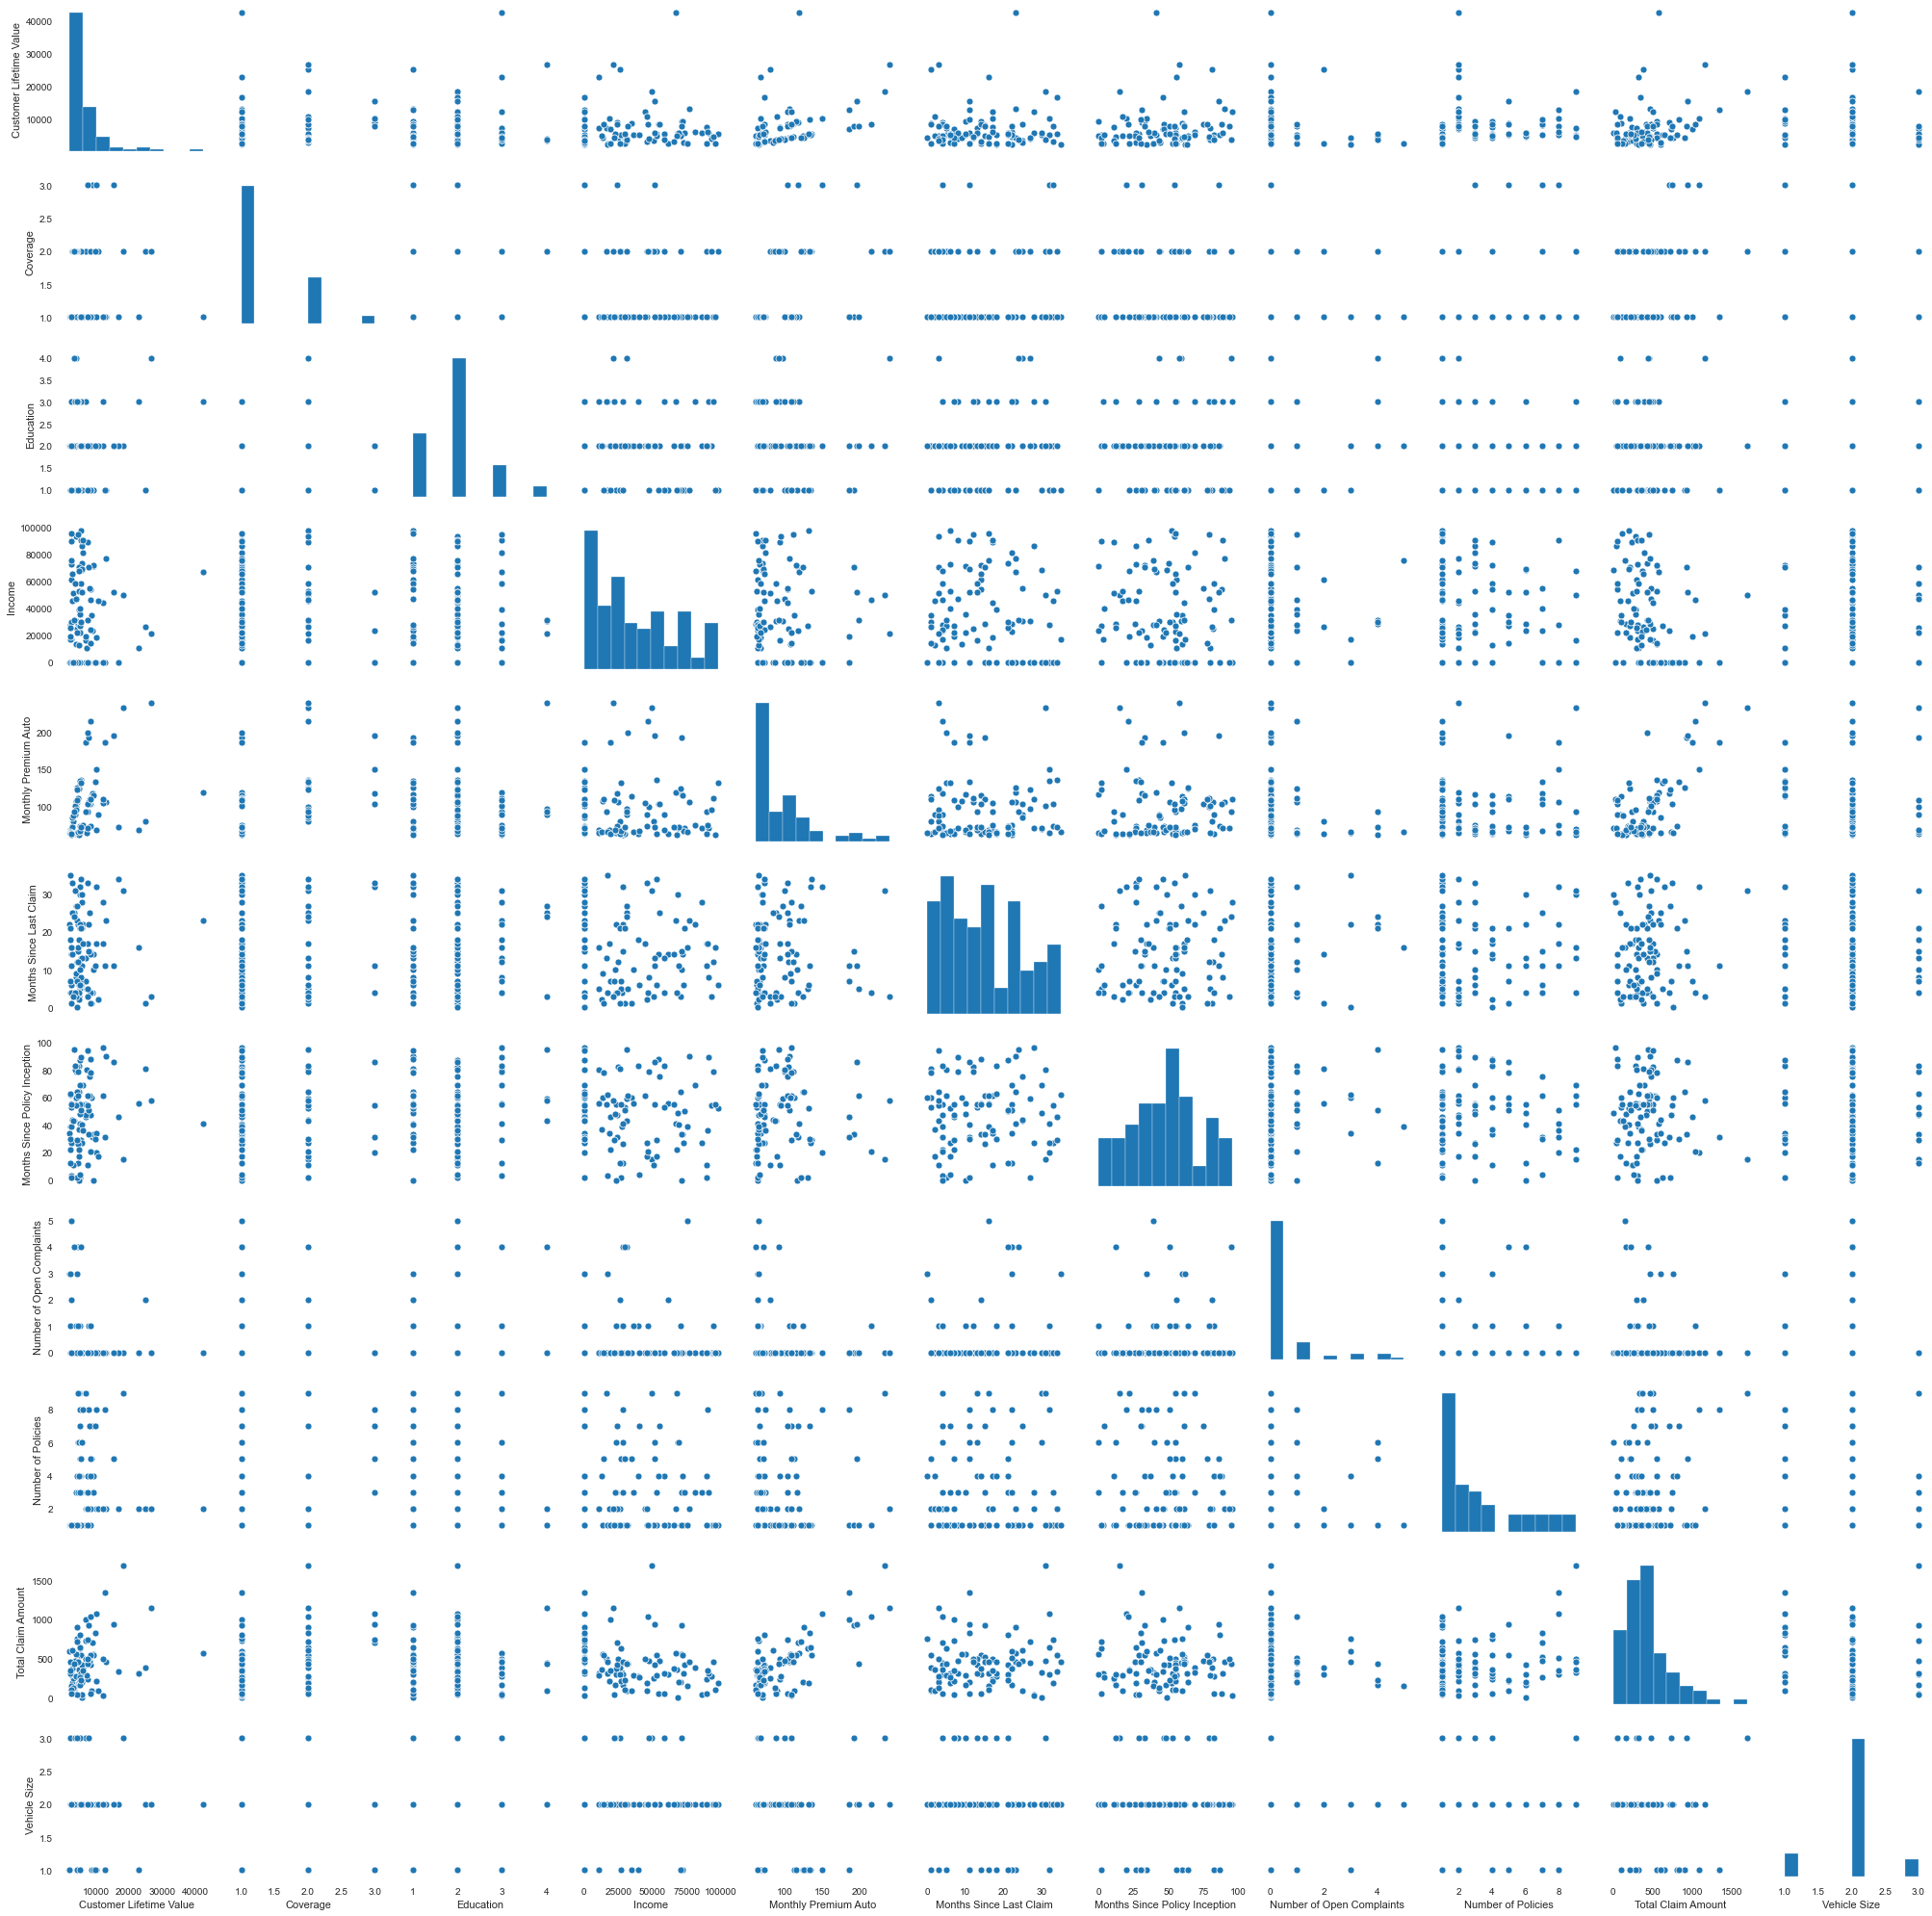

In [89]:
a = sns.pairplot(train_sample, vars=['Customer Lifetime Value', 
                                "Coverage", 
                                "Education", 
                                "Income",
                                "Monthly Premium Auto", 
                                'Months Since Last Claim', 
                                "Months Since Policy Inception", 
                                "Number of Open Complaints",
                                "Number of Policies", 
                                "Total Claim Amount",
                                "Vehicle Size"])

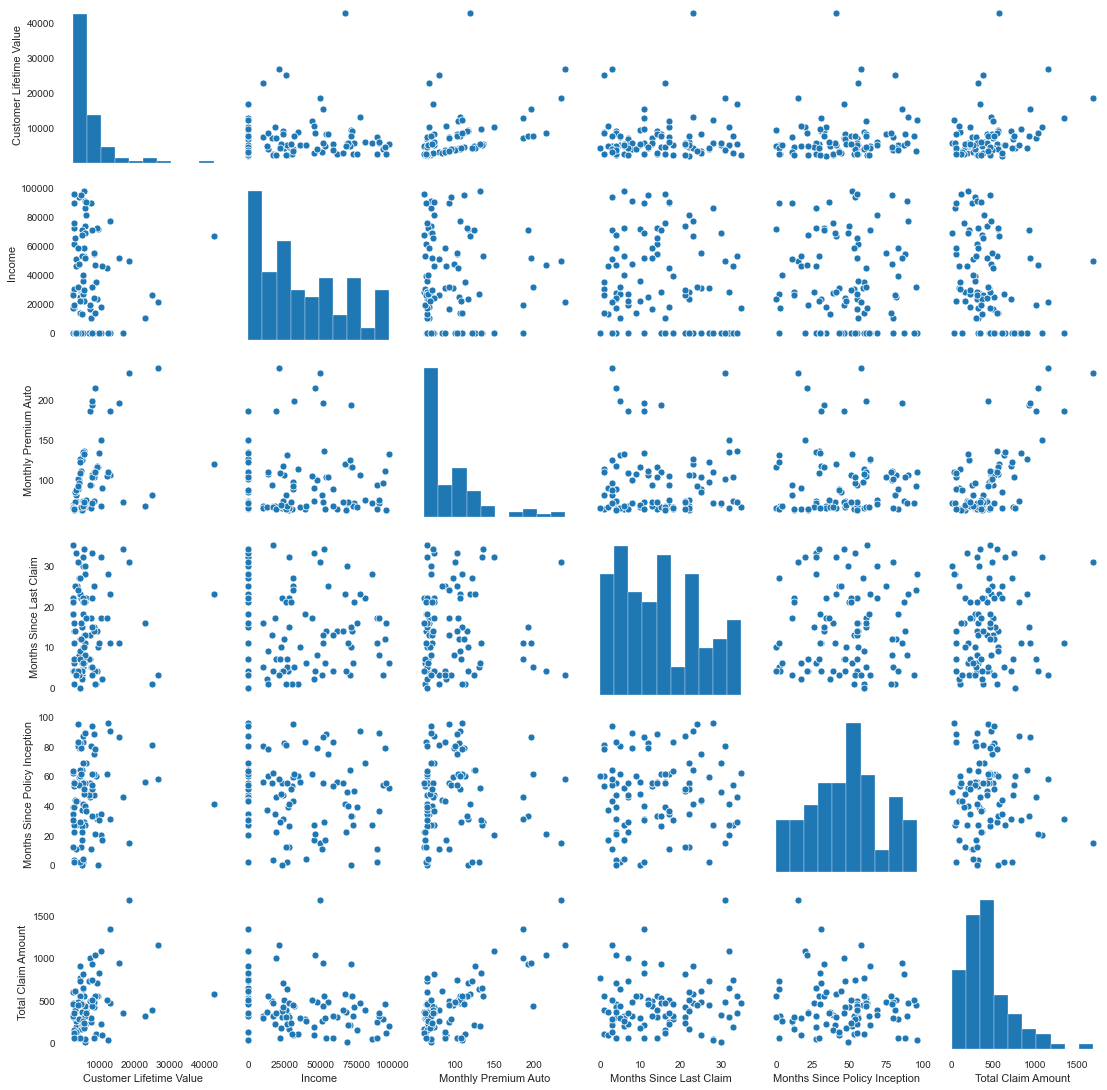

In [91]:
# focusing on interesting visualizations

b = sns.pairplot(train_sample, vars=['Customer Lifetime Value',
                                "Income",
                                "Monthly Premium Auto", 
                                'Months Since Last Claim', 
                                "Months Since Policy Inception", 
                                "Total Claim Amount"])